<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Inference - Estimation and confidence Intervals

**Introduction to Statistical Infernce**

- What is Statistical Inference?
  
  - Process of making conclusions about a population based on sample data

- Population vs Sample

- Goal

  - Estimate population paramters and assess the reliability of these estimates

**Point Estimation and Interval Estimation**

- Point Estimation

  - Single value estimation of a population parameter

- Interval Estimation

  - Provides a range of values within which the population is likely to lie

  - Confidence Interval(CI):

  $$CI = x̄ ± z * (s / √n)$$

x̄ : Sample Mean

z : Z-score corresponding to the confidence level

s : Sample standard deviation

n : Sample size

**Constructing Confidence Intervals**

- For Means

  - When the population standard deviation is unknown
  use the t-distribution for small samples(n<30)

$$CI = x̄ ± t * (s / √n)$$

- For Proportions

$$CI = p̂ ± Z * √( p̂(1 − p̂) / n )$$

p̂ : Sample Proportion

In [2]:
import numpy as np
from scipy.stats import t, norm

# sample data
data = [12, 14, 15, 16, 17, 18, 19]

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# 95% Confidence Interval (using t-distribution)
n = len(data)
t_value = t.ppf(0.975, df=n-1)
margin_of_error = t_value * (std_dev / np.sqrt(n))
ci = (mean - margin_of_error, mean + margin_of_error)
print("95% Confidence Interval: \n", ci)

95% Confidence Interval: 
 (np.float64(13.627991424548375), np.float64(18.086294289737342))


**Exercise 1 :- Calculate Confidence Intervals for sample data**

In [3]:
import numpy as np
from scipy.stats import norm
# Generate random sample data
data = np.random.normal(loc = 50, scale = 10, size = 100)

# Sample Statistics
mean = np.mean(data)
std = np.std(data, ddof =1)
n = len(data)

#95% Confidence Interval
z_value = norm.ppf(0.975)
margin_of_error = z_value * (std / np.sqrt(n))
ci = (mean - margin_of_error, mean + margin_of_error)
print("Sample Mean: \n", mean)
print("95% Confidence Interval: \n", ci)

Sample Mean: 
 50.19293657510677
95% Confidence Interval: 
 (np.float64(48.15653064985616), np.float64(52.22934250035738))


**Exercise 2 :- Conduct sampling and create a Report**

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from google.colab import files
uploaded = files.upload()

Saving iris.csv.txt to iris.csv.txt


In [5]:
df = pd.read_csv("iris.csv.txt")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Sampling
sample = df["sepal_length"].sample(30, random_state = 42)

# Sample Statistics
mean = sample.mean()
std = sample.std()
n = len(sample)

# Confidence Interval
z_vale = norm.ppf(0.975)
margin_of_error = z_value * (std / np.sqrt(n))
ci = (mean - margin_of_error, mean + margin_of_error)
print("Sample Mean: \n", mean)
print("95% Confidence Interval: \n", ci)

Sample Mean: 
 5.98
95% Confidence Interval: 
 (np.float64(5.677616880642557), np.float64(6.282383119357444))


**Additional Practice**
> 1. Create confidence Intervals for other statstics

In [9]:
import numpy as np
import scipy.stats as st

# 1. CI for Mean (σ unknown — t CI)
def ci_mean_t(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    s = np.std(data, ddof=1)
    t_value = st.t.ppf((1 + confidence)/2, df=n-1)
    margin = t_value * s / np.sqrt(n)
    return (mean - margin, mean + margin)

# 2. CI for Mean (σ known — Z CI)
def ci_mean_z(data, sigma, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    z_value = st.norm.ppf((1 + confidence)/2)
    margin = z_value * sigma / np.sqrt(n)
    return (mean - margin, mean + margin)

# 3. CI for Proportion
def ci_proportion(p_hat, n, confidence=0.95):
    z = st.norm.ppf((1 + confidence)/2)
    margin = z * np.sqrt(p_hat*(1-p_hat)/n)
    return (p_hat - margin, p_hat + margin)

# 4. CI for Two Means (independent)
def ci_two_means(data1, data2, confidence=0.95):
    n1, n2 = len(data1), len(data2)
    mean_diff = np.mean(data1) - np.mean(data2)

    s1, s2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
    se = np.sqrt((s1**2)/n1 + (s2**2)/n2)

    df = n1 + n2 - 2
    t_value = st.t.ppf((1 + confidence)/2, df=df)
    margin = t_value * se
    return (mean_diff - margin, mean_diff + margin)

# 5. CI for Paired Samples
def ci_paired(data_before, data_after, confidence=0.95):
    diff = np.array(data_after) - np.array(data_before)
    return ci_mean_t(diff, confidence)

# 6. CI for Two Proportions
def ci_two_proportions(p1, n1, p2, n2, confidence=0.95):
    z = st.norm.ppf((1 + confidence)/2)
    diff = p1 - p2
    se = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
    margin = z * se
    return (diff - margin, diff + margin)

# 7. CI for Variance (σ²)
def ci_variance(data, confidence=0.95):
    n = len(data)
    s2 = np.var(data, ddof=1)
    alpha = 1 - confidence

    lower = (n-1)*s2 / st.chi2.ppf(1 - alpha/2, df=n-1)
    upper = (n-1)*s2 / st.chi2.ppf(alpha/2, df=n-1)
    return (lower, upper)

# 8. CI for Standard Deviation (σ)
def ci_std(data, confidence=0.95):
    var_ci = ci_variance(data, confidence)
    return (np.sqrt(var_ci[0]), np.sqrt(var_ci[1]))

# 9. CI for Regression Slope
def ci_regression_slope(x, y, confidence=0.95):
    n = len(x)
    slope, intercept, r, p, se = st.linregress(x, y)
    t_value = st.t.ppf((1 + confidence)/2, df=n-2)
    margin = t_value * se
    return (slope - margin, slope + margin)

# 10. CI for Correlation (Fisher Transform)
def ci_correlation(r, n, confidence=0.95):
    z = 0.5 * np.log((1+r)/(1-r))
    se = 1 / np.sqrt(n - 3)
    z_crit = st.norm.ppf((1 + confidence)/2)

    lower_z = z - z_crit*se
    upper_z = z + z_crit*se

    lower = (np.exp(2*lower_z) - 1) / (np.exp(2*lower_z) + 1)
    upper = (np.exp(2*upper_z) - 1) / (np.exp(2*upper_z) + 1)
    return (lower, upper)

# Example Usage
data = [10, 12, 9, 11, 13, 12]

print("CI Mean (t): \n", ci_mean_t(data))
print("CI Variance: \n", ci_variance(data))
print("CI Std Dev: \n", ci_std(data))
print("CI Proportion: \n", ci_proportion(0.6, 100))


CI Mean (t): 
 (np.float64(9.621939230639487), np.float64(12.711394102693845))
CI Variance: 
 (np.float64(0.8442105318489918), np.float64(13.033183316449367))
CI Std Dev: 
 (np.float64(0.9188093011332611), np.float64(3.610150040711517))
CI Proportion: 
 (np.float64(0.5039817664728938), np.float64(0.6960182335271061))


> 2. Visualize confidence intervals for multiple samples using Matplotlib

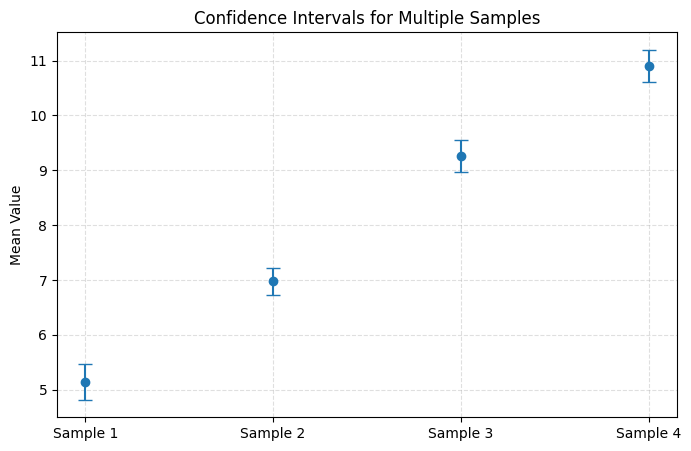

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Generate multiple samples (you can change means here)
np.random.seed(0)
samples = [np.random.normal(loc=mu, scale=1, size=50) for mu in [5, 7, 9, 11]]

# Compute means and 95% CI for each sample
means = [np.mean(s) for s in samples]
cis_lower = []
cis_upper = []

for s in samples:
    n = len(s)
    mean = np.mean(s)
    sd = np.std(s, ddof=1)
    t = st.t.ppf(0.975, df=n-1)   # 95% CI
    margin = t * sd / np.sqrt(n)
    cis_lower.append(mean - margin)
    cis_upper.append(mean + margin)

# Prepare CI error values for Matplotlib
lower_err = [means[i] - cis_lower[i] for i in range(len(means))]
upper_err = [cis_upper[i] - means[i] for i in range(len(means))]
asymmetric_error = [lower_err, upper_err]

# Plot CI
plt.figure(figsize=(8,5))
plt.errorbar(
    x=np.arange(len(means)),
    y=means,
    yerr=asymmetric_error,
    fmt='o',
    capsize=5
)

plt.xticks(np.arange(len(means)), [f"Sample {i+1}" for i in range(len(means))])
plt.ylabel("Mean Value")
plt.title("Confidence Intervals for Multiple Samples")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()